## Pierwsza rzecz: jak reprezentowac/zakodowac obrazek w programie?

### Pierwszy przykład z internetu:
https://stackoverflow.com/questions/44755458/display-pixels-values-as-an-image

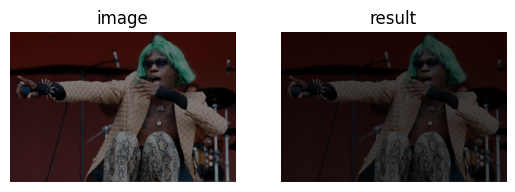

In [1]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('yvestumor.jpg')

each_pixel = image.ravel()
some_calculation = 2

result = each_pixel // some_calculation
result.shape = image.shape

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image, cmap='gray')
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(result, cmap='gray')
ax1.axis('off')
ax1.set_title('result')
plt.show()

### Drugi przykład z internu:
https://stackoverflow.com/questions/44755458/display-pixels-values-as-an-image

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


plt.imsave('yvestumor.jpg', np.array(result), cmap=cm.gray)
# plt.imshow(np.array(result))

wymiary = result.shape 
print("wymiary tablicy z pixelami: ", wymiary)

print(result)


wymiary tablicy z pixelami:  (1728, 2592, 3)
[[[28  4  2]
  [28  4  2]
  [28  4  2]
  ...
  [25  4  2]
  [25  4  2]
  [25  4  2]]

 [[28  4  2]
  [28  4  2]
  [28  4  2]
  ...
  [25  4  2]
  [25  4  2]
  [25  4  2]]

 [[28  4  2]
  [28  4  2]
  [28  4  2]
  ...
  [25  4  2]
  [25  4  2]
  [25  4  2]]

 ...

 [[24  9 10]
  [24  9 10]
  [24 10 11]
  ...
  [31 28 32]
  [31 28 32]
  [31 28 32]]

 [[25 10 11]
  [25 10 11]
  [25 10 11]
  ...
  [32 28 32]
  [32 28 32]
  [32 29 33]]

 [[26 11 12]
  [26 11 12]
  [25 11 12]
  ...
  [33 29 33]
  [33 29 33]
  [33 29 33]]]


## TO DO: 
    * napisać strukture, która będzie reprezentować ułóżenie plam (kół) kolorów 

        ** JAKIE INFORMACJE POWINNA ZAWIERAC?

        (*) liczbe plam 
        (*) położeni każdej z nich (współrzędna $x$ oraz $y$)
        (*) rozmiar obrazka (na którym rozmieszczone sa te plamy)
        (*) pryriorytet każdego koloru 

        ** JAKIE METODY MA MIEC DO DYSPOZYCJI?

        (*) konwertowanie do tablicy z pixelami 

In [6]:
class splash:
    def __init__(self, color, rank):
        self.color = color
        self.rank  = rank 

class Individual:
    """
    LENGTH, WIDTH - parametry obrazka
    N             - liczba plam  
    R             - promień plamy 
    """
    LENGTH, WIDTH = 10, 10   
    N             = 100
    R             = 2 

    """
    splash_parameters - tablica z parametrami kolejnych plam (kolorem rangą)
    splash_layout     - tablica z rozmieszczeniem kolejnych plam (para współrzędnych)
    """
    def __init__(self, splash_parameters, splash_layout):
        self.splash_parameters = splash_parameters
        self.splash_layout = splash_layout

    """
    zwraca tablice z wartością koloru w kazdym pixelu obrazka 
    """
    def convert_to_pixels_array(self):

        def outside_of_frame(pixel):
            return ((pixel[0] < 0 or Individual.LENGTH <= pixel[0]) or
                    (pixel[1] < 0 or Individual.WIDTH <= pixel[1]))
         
        pixels_array = np.zeros((Individual.WIDTH, Individual.LENGTH, 3))
        pixels_array_ranks = np.zeros((Individual.WIDTH, Individual.LENGTH, 1))

        splash_index = 0 
        for x,y in self.splash_layout:
            splash = self.splash_parameters[splash_index]

            for t in range(-Individual.R,Individual.R+1):
                for s in range(-Individual.R,Individual.R+1):

                    pixel = (x+t, y+s)
                    if outside_of_frame(pixel):
                        continue
                    
                    if pixels_array_ranks[pixel[0]][pixel[1]] < splash.rank:
                        pixels_array[pixel[0]][pixel[1]] = splash.color
                        pixels_array_ranks[pixel[0]][pixel[1]] = splash.rank
